In [1]:
from load_data import DataLoader
data_loader = DataLoader(use_graph_embeddings = False)  

assign reindex to concepts
data reindexing


100%|██████████| 19734/19734 [00:00<00:00, 86863.95it/s]

vocab_size: 8323


In [2]:
data = data_loader.reidx_dat

In [3]:
pat_c2i = data_loader.pat_c2i
import pickle

with open('datasets/pat_c2i.pickle', 'wb') as handle:
    pickle.dump(pat_c2i, handle)

In [4]:
from training import Training
import torch
torch.cuda.set_device(2)
device = torch.device('cuda')
training = Training(data, embedding_dim=32, vocab_size = len(pat_c2i.keys())+1, device = device)

create datasets
create trainloaders


In [6]:
best_model, train_loss, val_loss = training.training()

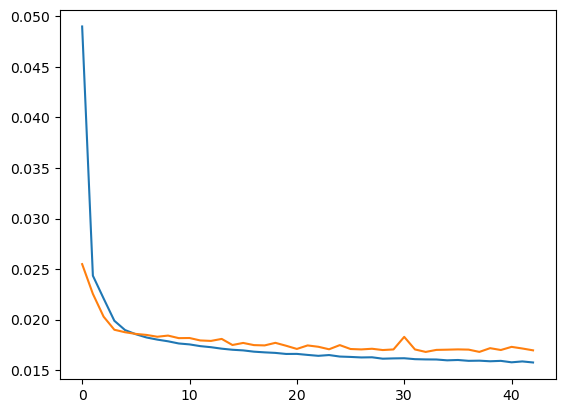

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)

In [ ]:
import pickle

torch.save(best_model, 'model/tf_dx.pt')
with open('model/train_losses_tf_dx.pickle', 'wb') as handle:
    pickle.dump(train_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('model/val_losses_tf_dx.pickle', 'wb') as handle:
    pickle.dump(val_loss, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model = training.model

test_data = training.data_splits.test_data
_, _, test_ids = training.data_splits.split_ids()

from evaluate_performance import Evaluate
ev = Evaluate(test_data, test_ids, model, 'model/tf_dx.pt')

100%|██████████| 5/5 [03:42<00:00, 44.49s/it]


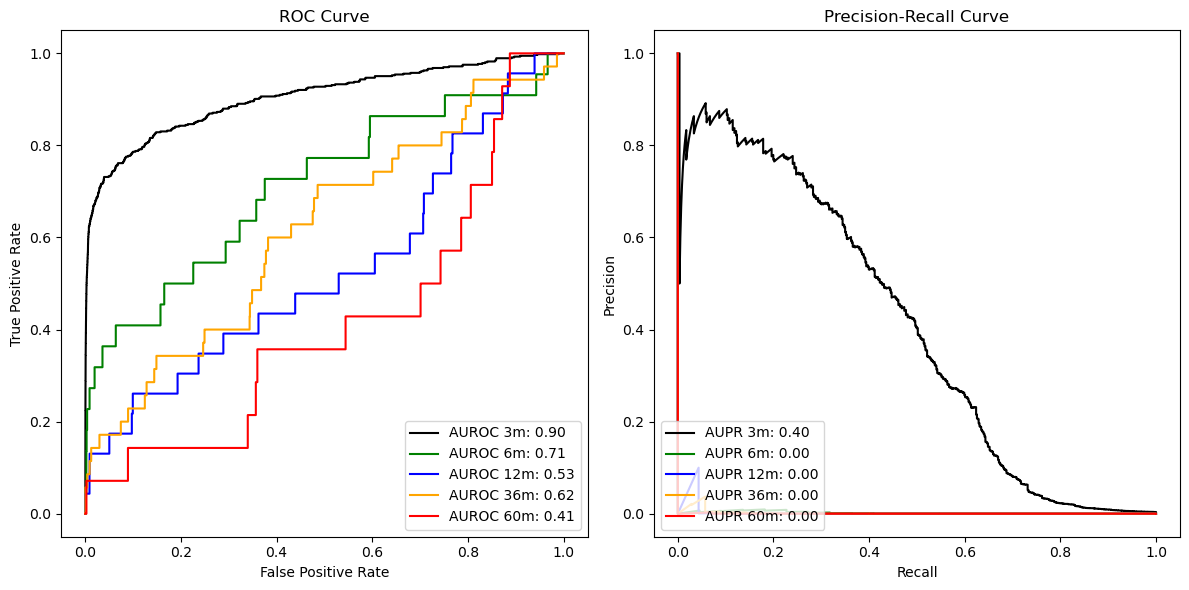

sensitivity at 0.999 specificity: {'3m': 0.37985865724381623, '6m': 0.045454545454545456, '12m': 0.043478260869565216, '36m': 0.05714285714285714, '60m': 0.0}
specificity at 0.999 sensitivity: {'3m': array(0.0096965), '6m': array(0.03332336), '12m': array(0.06068111), '36m': array(0.01386033), '60m': array(0.11234059)}


In [ ]:
ev.sens_spec(specAt = 0.999)

In [ ]:
rs = ev.raw_scores()

In [ ]:
import pickle
with open('output/rs_tf_dx.pickle', 'wb') as handle:
    pickle.dump(rs, handle)